In [122]:
import pandas as pd     # For analyzing the dataset
import matplotlib.pyplot as plt # For visualizing the dataset
import seaborn as sns   # For analyzing and visualizing correlations in the dataset
df = pd.read_csv("data/cybersecurity_attacks.csv")


### Which protocols were targeted most by the attacks in the dataset?

Protocol
ICMP    13429
UDP     13299
TCP     13272
Name: count, dtype: int64


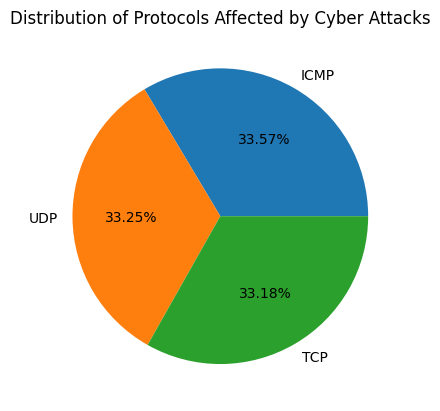

In [123]:
protocols = df['Protocol'].value_counts()
print(protocols)
a = plt.pie(protocols, labels=protocols.index, autopct='%1.2f%%')
plt.title('Distribution of Protocols Affected by Cyber Attacks')
plt.subplot()
plt.show()

The dataset includes a total of three different protocols that were affected by the attacks logged: ICMP, TCP, and UDP. To better understand the frequency of these attacks on each of the individual protocols, we first listed the value counts for each protcol in the dataset, then created a simple pie chart that represents the distribution of these attacks across each protocol.

As shown by the pie chart, ICMP was the protocol affected by the majority of the attacks logged in the dataset, comprising of 33.57% of the total attacks.

### Which Types of Traffic had the longest packet lengths on average?

Traffic Type
DNS     781.03
FTP     780.95
HTTP    782.37
Name: Packet Length, dtype: float64


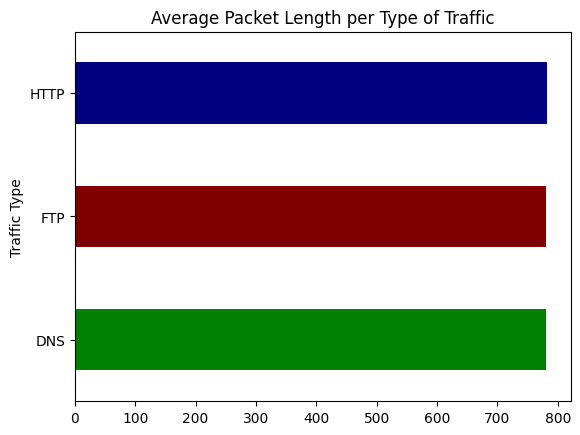

In [133]:
length_per_trafficType = df.groupby('Traffic Type')['Packet Length'].mean().round(2)
print(length_per_trafficType)
length_per_trafficType.plot(kind='barh', color=['green','maroon','navy'])
plt.title('Average Packet Length per Type of Traffic')
plt.show()

We would also like to know which types of traffic that the attacks used consisted of the largest average packet sizes. To analyze this data, we first grouped the data set by the type of traffic used, then calculated the average packet length for each.

As represented by both the analysis and the bar chart, the type of traffic did not majorly affect the length of the packets, as they only have a difference of 1-2 packets.

### How do the actions taken in response to each attack correlate to the severity level?

In [85]:
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall
